In [1]:
import pandas as pd
from google.colab import drive

In [2]:
# move to googel drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#create the file path
path = "gdrive/My Drive/ass1/diabetes.csv"

In [4]:
# read csv file
df = pd.read_csv(path)

In [5]:
df.iloc[0]

-1 1:-0.294118 2:0.487437 3:0.180328 4:-0.292929 5:-1 6:0.00149028 7:-0.53117 8:-0.0333333     +1 1:-0.882353 2:-0.145729 3:0.0819672 4:-0.41...
Name: 0, dtype: object

In [6]:
# create txt file path
path_txt = "gdrive/My Drive/ass1/diabetes.txt"

In [7]:
# Define the column names
column_names = ['Label'] + [f'Feature_{i}' for i in range(1, 9)]

# Read the data into a DataFrame
df = pd.read_csv(path_txt, sep=' ', header=None)


In [8]:
df.drop(df.columns[-1], axis=1, inplace=True)

In [9]:
df.columns = column_names

In [10]:
df

,Label,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8
0,-1,1:-0.294118,2:0.487437,3:0.180328,4:-0.292929,5:-1,6:0.00149028,7:-0.53117,8:-0.0333333
1,1,1:-0.882353,2:-0.145729,3:0.0819672,4:-0.414141,5:-1,6:-0.207153,7:-0.766866,8:-0.666667
2,-1,1:-0.0588235,2:0.839196,3:0.0491803,4:-1,5:-1,6:-0.305514,7:-0.492741,8:-0.633333
3,1,1:-0.882353,2:-0.105528,3:0.0819672,4:-0.535354,5:-0.777778,6:-0.162444,7:-0.923997,8:-1
4,-1,1:-1,2:0.376884,3:-0.344262,4:-0.292929,5:-0.602837,6:0.28465,7:0.887276,8:-0.6
...,...,...,...,...,...,...,...,...,...
763,1,1:0.176471,2:0.0150754,3:0.245902,4:-0.030303,5:-0.574468,6:-0.019374,7:-0.920581,8:0.4
764,1,1:-0.764706,2:0.226131,3:0.147541,4:-0.454545,5:-1,6:0.0968703,7:-0.77626,8:-0.8
765,1,1:-0.411765,2:0.21608,3:0.180328,4:-0.535354,5:-0.735225,6:-0.219076,7:-0.857387,8:-0.7
766,-1,1:-0.882353,2:0.266332,3:-0.0163934,4:-1,5:-1,6:-0.102832,7:-0.768574,8:-0.133333


In [11]:
# For each feature column, extract the numbers after the colon and store them in a new column
for column in df.columns[1:]:  # Iterate from the second column onwards, skipping the label column
    df[column] = df[column].str.split(':').str[1].astype(float)


In [12]:
df.values

array([[-1.        , -0.294118  ,  0.487437  , ...,  0.00149028,
        -0.53117   , -0.0333333 ],
       [ 1.        , -0.882353  , -0.145729  , ..., -0.207153  ,
        -0.766866  , -0.666667  ],
       [-1.        , -0.0588235 ,  0.839196  , ..., -0.305514  ,
        -0.492741  , -0.633333  ],
       ...,
       [ 1.        , -0.411765  ,  0.21608   , ..., -0.219076  ,
        -0.857387  , -0.7       ],
       [-1.        , -0.882353  ,  0.266332  , ..., -0.102832  ,
        -0.768574  , -0.133333  ],
       [ 1.        , -0.882353  , -0.0653266 , ..., -0.0938897 ,
        -0.797609  , -0.933333  ]])

In [13]:
df = df.dropna()

In [14]:
# split data
from sklearn.model_selection import train_test_split
# Split the dataset into train and test sets with stratification
bigtrain_set,test_set = train_test_split(df, test_size=0.2, stratify=df.iloc[:,0], random_state=42)
train_set, val_set = train_test_split(bigtrain_set, stratify=bigtrain_set.iloc[:,0],test_size=0.2, random_state=42)

In [15]:
print(train_set.describe())

            Label   Feature_1   Feature_2   Feature_3   Feature_4   Feature_5  \
count  485.000000  485.000000  485.000000  485.000000  485.000000  485.000000   
mean     0.307216   -0.553912    0.221530    0.134933   -0.581464   -0.810943   
std      0.952622    0.394853    0.315028    0.319583    0.326883    0.269266   
min     -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   
25%     -1.000000   -0.882353    0.005025    0.049180   -1.000000   -1.000000   
50%      1.000000   -0.647059    0.175879    0.180328   -0.535354   -0.905437   
75%      1.000000   -0.294118    0.427136    0.311475   -0.353535   -0.702128   
max      1.000000    0.764706    0.979899    1.000000    1.000000    0.758865   

        Feature_6   Feature_7   Feature_8  
count  485.000000  485.000000  485.000000  
mean    -0.042574   -0.675054   -0.591821  
std      0.239724    0.278805    0.387410  
min     -1.000000   -1.000000   -1.000000  
25%     -0.180328   -0.860803   -0.900000  
50%   

In [16]:
print(val_set.describe())

            Label   Feature_1   Feature_2   Feature_3   Feature_4   Feature_5  \
count  122.000000  122.000000  122.000000  122.000000  122.000000  122.000000   
mean     0.311475   -0.556413    0.167971    0.086133   -0.622123   -0.811960   
std      0.954173    0.389689    0.313310    0.342886    0.324365    0.298510   
min     -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   
25%     -1.000000   -0.882353   -0.025126   -0.008197   -1.000000   -1.000000   
50%      1.000000   -0.647059    0.115578    0.147541   -0.575758   -1.000000   
75%      1.000000   -0.294118    0.344221    0.278689   -0.353535   -0.683806   
max      1.000000    0.529412    0.969849    0.639344    0.030303    1.000000   

        Feature_6   Feature_7   Feature_8  
count  122.000000  122.000000  122.000000  
mean    -0.070362   -0.636873   -0.616667  
std      0.228254    0.292171    0.397334  
min     -1.000000   -0.994876   -1.000000  
25%     -0.219076   -0.863152   -0.933333  
50%   

In [17]:
print(test_set.describe())

            Label   Feature_1   Feature_2   Feature_3   Feature_4   Feature_5  \
count  152.000000  152.000000  152.000000  152.000000  152.000000  152.000000   
mean     0.302632   -0.551858    0.216808    0.151424   -0.565789   -0.817080   
std      0.956258    0.394684    0.346485    0.287467    0.305106    0.265165   
min     -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   
25%     -1.000000   -0.882353   -0.005025    0.049180   -1.000000   -1.000000   
50%      1.000000   -0.647059    0.175879    0.180328   -0.494949   -0.919622   
75%      1.000000   -0.294118    0.399497    0.311475   -0.348484   -0.715130   
max      1.000000    1.000000    1.000000    0.803279    0.050505    0.607565   

        Feature_6   Feature_7   Feature_8  
count  152.000000  152.000000  152.000000  
mean    -0.041062   -0.653350   -0.608553  
std      0.228780    0.285246    0.387507  
min     -1.000000   -0.994022   -1.000000  
25%     -0.184053   -0.849915   -0.900000  
50%   

In [18]:
# Create a y_train set containing the "Label" column
y_train = train_set["Label"]

# Create a y_val set containing the "Label" column
y_val = val_set["Label"]

# Create a y_val set containing the "Label" column
y_test = test_set["Label"]


In [19]:
# show the information of above three set
print(y_train.describe())
result = all(val == -1 or val == 1 for val in y_train)
print(result)
print("shape of y_train: ", y_train.shape)
print()
print(y_val.describe())
print("shape of y_val: ", y_val.shape)
print()
print(y_test.describe())
print("shape of y_test: ", y_test.shape)
result = all(val == -1 or val == 1 for val in y_test)
print(result)



count    485.000000
mean       0.307216
std        0.952622
min       -1.000000
25%       -1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Label, dtype: float64
True
shape of y_train:  (485,)

count    122.000000
mean       0.311475
std        0.954173
min       -1.000000
25%       -1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Label, dtype: float64
shape of y_val:  (122,)

count    152.000000
mean       0.302632
std        0.956258
min       -1.000000
25%       -1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Label, dtype: float64
shape of y_test:  (152,)
True


In [20]:
# Create a y_train set containing the "Label" column
y_train = train_set["Label"].values

# Create a y_val set containing the "Label" column
y_val = val_set["Label"].values


# Create a y_val set containing the "Label" column
y_test = test_set["Label"].values


In [21]:
# Create a X_train set containing the feature columns (excluding the "Label" column)
X_train = train_set.drop(columns=["Label"])

# Create a X_val set containing the feature columns (excluding the "Label" column)
X_val = val_set.drop(columns=["Label"])

# Create an X_test containing the feature columns (excluding the "Label" column)
X_test = test_set.drop(columns=["Label"])

In [22]:
# show the information of above three set
print(X_train.describe())
print("the shape of X_train:" , X_train.shape)
print()
print(X_val.describe())
print("the shape of X_val:" , X_val.shape)
print()
print(X_test.describe())
print("the shape of X_test:" , X_test.shape)


        Feature_1   Feature_2   Feature_3   Feature_4   Feature_5   Feature_6  \
count  485.000000  485.000000  485.000000  485.000000  485.000000  485.000000   
mean    -0.553912    0.221530    0.134933   -0.581464   -0.810943   -0.042574   
std      0.394853    0.315028    0.319583    0.326883    0.269266    0.239724   
min     -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   
25%     -0.882353    0.005025    0.049180   -1.000000   -1.000000   -0.180328   
50%     -0.647059    0.175879    0.180328   -0.535354   -0.905437   -0.037258   
75%     -0.294118    0.427136    0.311475   -0.353535   -0.702128    0.090909   
max      0.764706    0.979899    1.000000    1.000000    0.758865    1.000000   

        Feature_7   Feature_8  
count  485.000000  485.000000  
mean    -0.675054   -0.591821  
std      0.278805    0.387410  
min     -1.000000   -1.000000  
25%     -0.860803   -0.900000  
50%     -0.762596   -0.733333  
75%     -0.561913   -0.333333  
max      1.000

create perceptron model

In [23]:
# Create a X_train set containing the feature columns (excluding the "Label" column)
X_train = train_set.drop(columns=["Label"]).values

# Create a X_val set containing the feature columns (excluding the "Label" column)
X_val = val_set.drop(columns=["Label"]).values

# Create an X_test containing the feature columns (excluding the "Label" column)
X_test = test_set.drop(columns=["Label"]).values

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Convert data to PyTorch tensors
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)
X_val = torch.FloatTensor(X_val)
y_val = torch.FloatTensor(y_val)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test)

# Define the Perceptron model
class Perceptron(nn.Module):
    def __init__(self, input_size):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(input_size, 1)  # Single output neuron for binary classification

    def forward(self, x):
        x = torch.sigmoid(self.fc(x))
        return x

# Initialize the Perceptron model
input_size = X_train.shape[1]
model = Perceptron(input_size)

# Define loss and optimizer
#criterion = nn.MarginRankingLoss(margin=0)  # Binary Cross-Entropy Loss
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent



In [25]:
# Map labels to [0, 1] range using sigmoid
sigmoid = nn.Sigmoid()
y_train = (y_train + 1) / 2  # Map -1 to 0 and 1 to 1
y_train

tensor([1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0.,
        1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0.,
        1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
        0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
        0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0.,
        0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1.,
        1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
        1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
        1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
        1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1.,
        0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0.,
        1., 1., 1., 1., 0., 0., 1., 1., 

In [26]:
X_train.shape

torch.Size([485, 8])

In [27]:
print(type(y_train))
y_train.view(-1,1)

<class 'torch.Tensor'>


tensor([[1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
      

In [28]:
# Training loop
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
   # print(outputs)
    y_train_reshaped = y_train.view(-1, 1)

    #loss = criterion(outputs, y_train_reshaped, torch.ones_like(y_train_reshaped))
    loss = criterion(outputs, y_train.view(-1, 1))

    loss.backward()
    optimizer.step()

#print(outputs)


In [29]:
# Evaluation
with torch.no_grad():
    y_pred = model(X_test)
    #print(y_pred)

    y_pred = (y_pred >= 0.5).float()  # Convert to binary predictions (0 or 1)
    y_pred[y_pred == 0] = -1

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

Accuracy: 0.69
Precision: 0.69
Recall: 0.95
F1 Score: 0.80


In [30]:
best_accuracy = 0
best_learning_rate = 0
best_num_epochs = 0

for learning_rate in [0.01, 0.1, 0.2]:
    for num_epochs in [50, 100, 200]:
        perceptron = Perceptron(input_size)
        optimizer = optim.SGD(perceptron.parameters(), lr=learning_rate)
        criterion = nn.BCELoss()

        for epoch in range(num_epochs):
            optimizer.zero_grad()
            outputs = perceptron(X_train)
            loss = criterion(outputs, y_train.view(-1,1))
            loss.backward()
            optimizer.step()

        # Evaluate on the test set
        with torch.no_grad():
            y_pred = perceptron(X_test)
            y_pred = (y_pred >= 0.5).float()  # Convert to binary predictions (0 or 1)
            y_pred[y_pred == 0] = -1

            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)

            # predictions = (test_outputs >= 0.5).float()
            # accuracy = torch.sum(predictions == y_test) / y_test.size(0)
            # print(torch.sum(predictions == y_test))
            # print(y_test.size(0))

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_learning_rate = learning_rate
            best_num_epochs = num_epochs

print("Best Hyperparameters:")
print("Learning Rate:", best_learning_rate)
print("Number of Epochs:", best_num_epochs)
print("Best Accuracy:", best_accuracy.item())

Best Hyperparameters:
Learning Rate: 0.2
Number of Epochs: 200
Best Accuracy: 0.7697368421052632


In [ ]:
# best_accuracy = 0
# best_hyperparameters = {}

# # Perform grid search over hyperparameters
# for lr, num_epochs in product(learning_rates, epochs):
#     model = Perceptron(eta0=lr, max_iter=num_epochs, random_state=42)
#     model.fit(X_train, y_train)
#     y_val_pred = model.predict(X_val)
#     accuracy = accuracy_score(y_val, y_val_pred)

#     if accuracy > best_accuracy:
#         best_accuracy = accuracy
#         best_hyperparameters = {'learning_rate': lr, 'epochs': num_epochs}

# print("Best Hyperparameters:", best_hyperparameters)
# print("Best Accuracy:", best_accuracy)

In [31]:
### method2

from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train, y_train)
Perceptron()
clf.score(X_test, y_test)


0.618421052631579

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best Hyperparameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'solver': 'adam'}
Accuracy: 0.5789473684210527
Precision: 0.5210526315789474
Recall: 0.5789473684210527
F1 Score: 0.5484764542936289


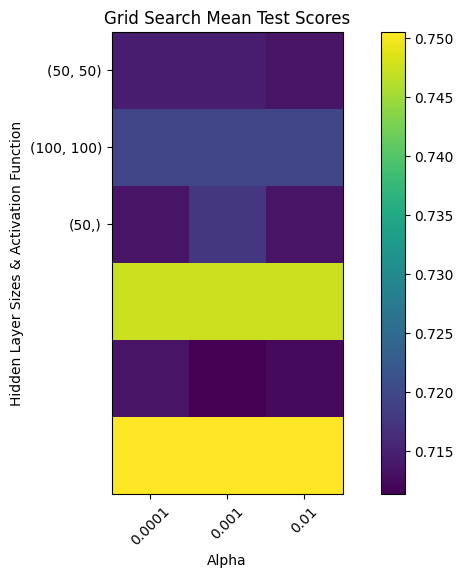

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, cross_val_predict


# Define a range of hyperparameters to tune
param_grid = {
    'hidden_layer_sizes': [(50, 50), (100, 100), (50,)],
    'activation': ['relu', 'tanh'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'solver': ['sgd', 'adam'],
    'learning_rate': ['constant', 'adaptive']
}

# Create an MLP classifier
mlp = MLPClassifier(random_state=42)

# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_mlp = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_mlp.predict(X_test)

# Calculate various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the best hyperparameters and metrics
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot cross-validation results for different hyperparameters
results = pd.DataFrame(grid_search.cv_results_)
results = results[['param_hidden_layer_sizes', 'param_activation', 'param_alpha', 'mean_test_score']]

# Pivot the DataFrame for easy plotting
results_pivot = results.pivot_table(index=['param_hidden_layer_sizes', 'param_activation'], columns='param_alpha', values='mean_test_score')

# Create a heatmap to visualize results
plt.figure(figsize=(10, 6))
plt.title("Grid Search Mean Test Scores")
plt.xlabel("Alpha")
plt.ylabel("Hidden Layer Sizes & Activation Function")
plt.imshow(results_pivot, interpolation='nearest', cmap='viridis')
plt.colorbar()
plt.xticks(np.arange(len(param_grid['alpha'])), param_grid['alpha'], rotation=45)
plt.yticks(np.arange(len(param_grid['hidden_layer_sizes'])), [str(x) for x in param_grid['hidden_layer_sizes']])
plt.show()


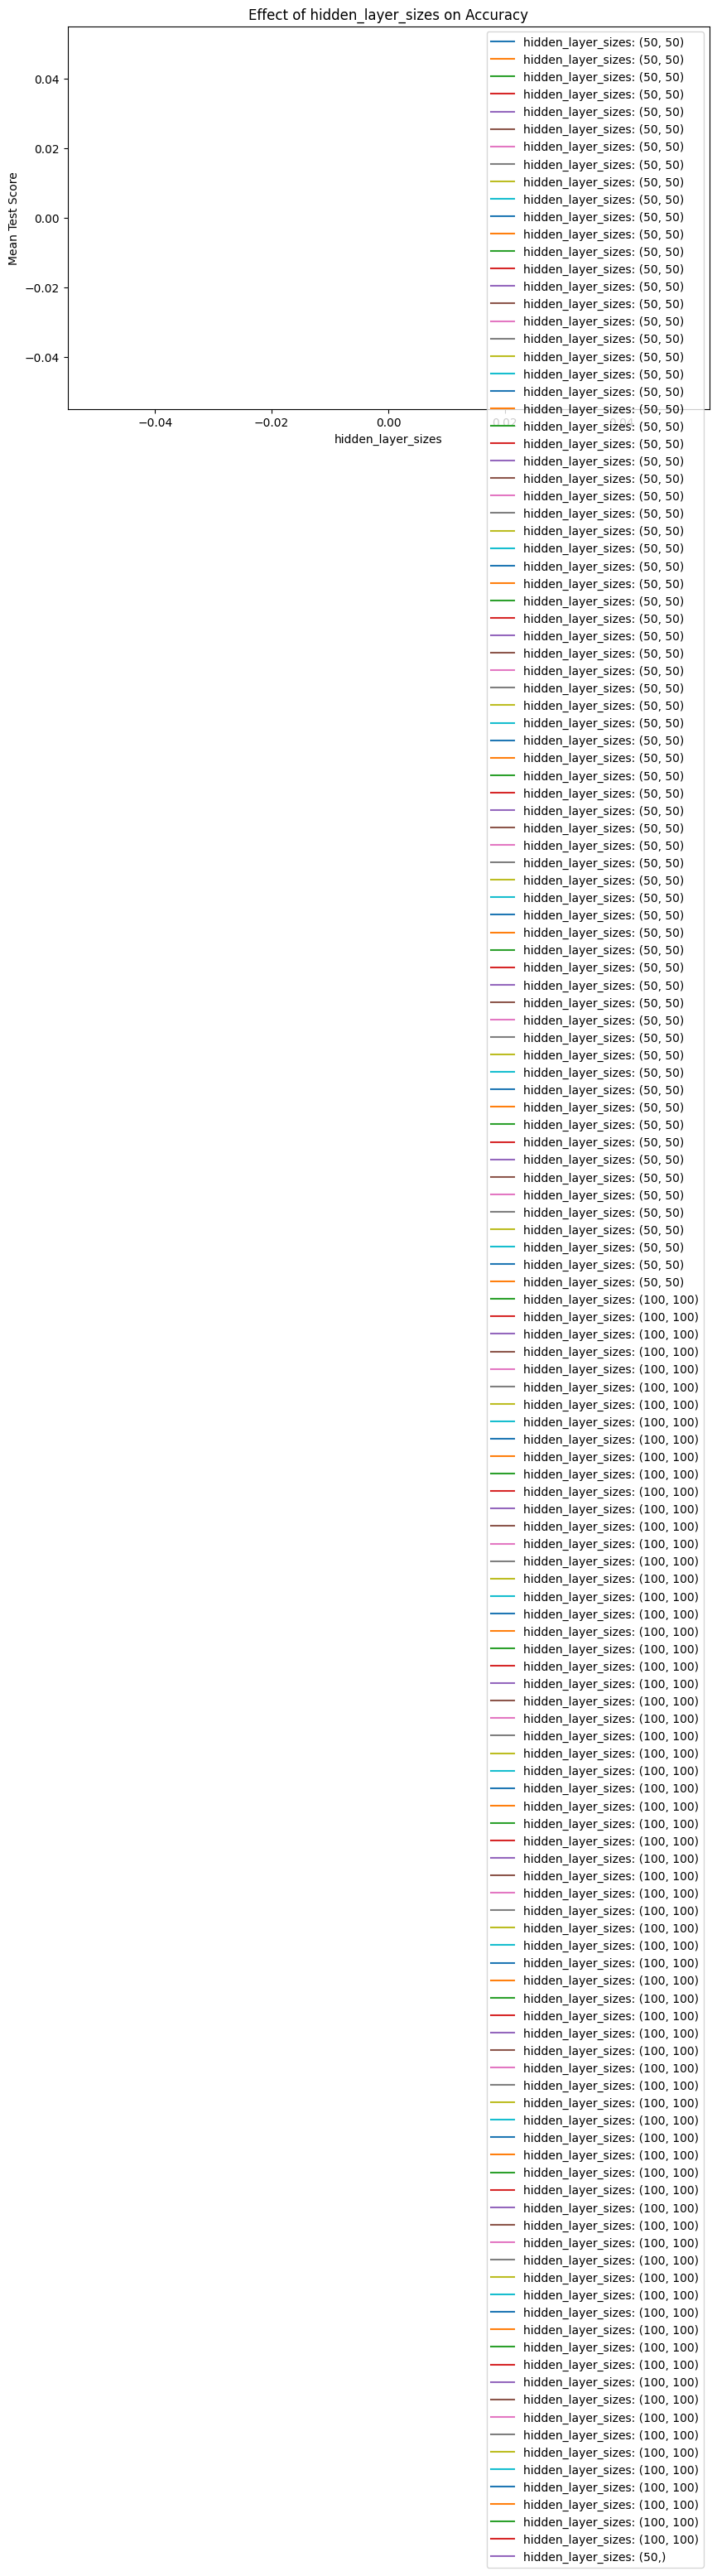

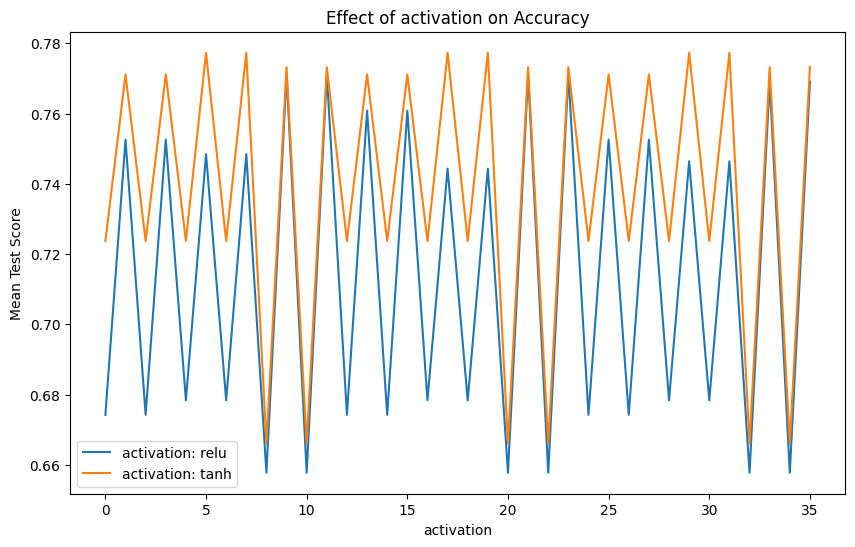

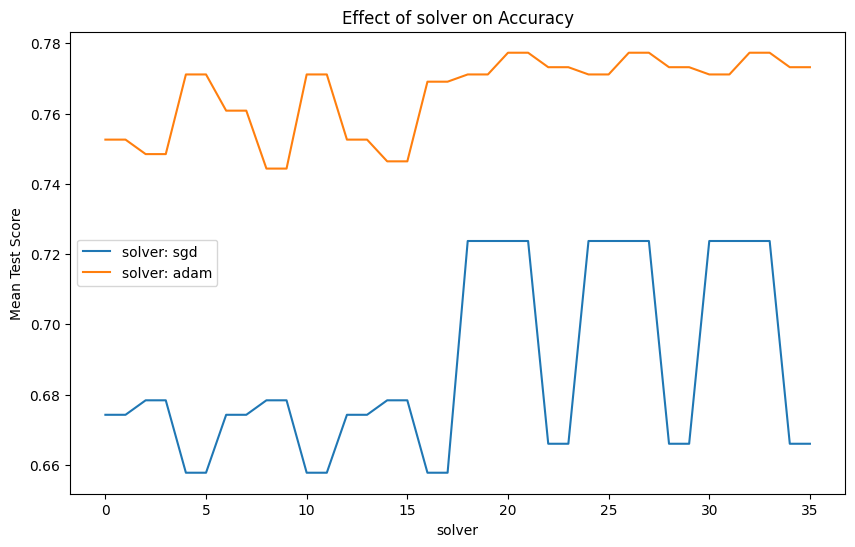

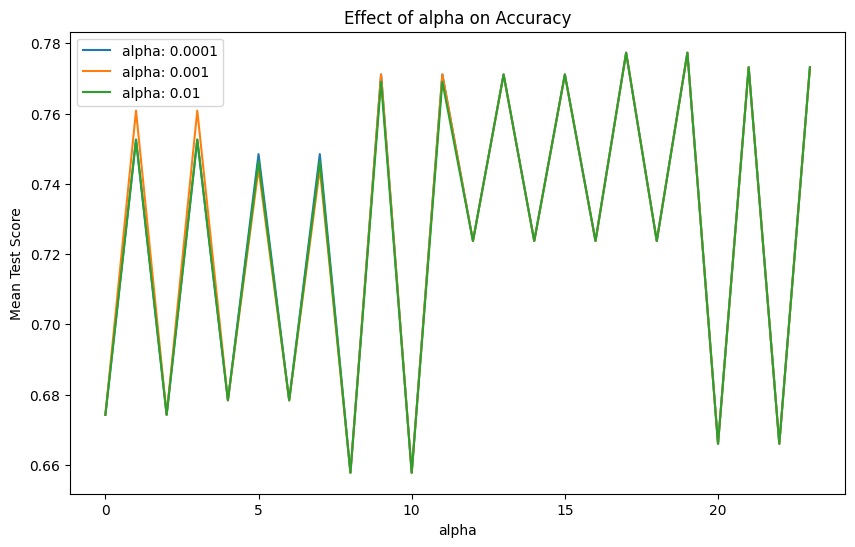

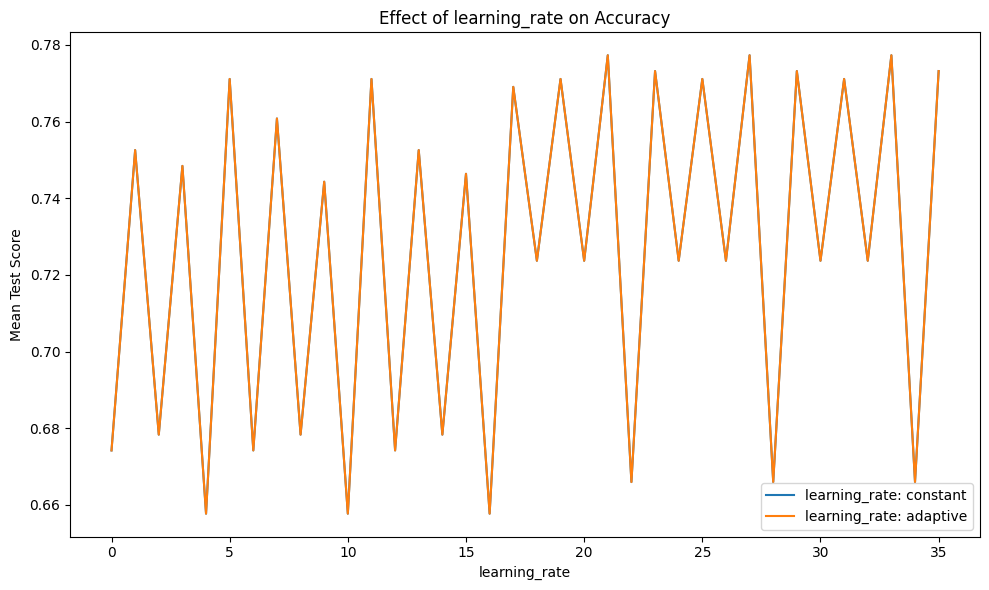

In [33]:
# mlp = MLPClassifier(max_iter=1000, random_state=42)

# grid_search = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1)
# grid_search.fit(X_train, y_train)

# print("Best Parameters: ", grid_search.best_params_)
# best_mlp = grid_search.best_estimator_
# y_pred = best_mlp.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy on Test Set: {:.2f}%".format(accuracy * 100))

# results = grid_search.cv_results_

# # Plot the effect of hidden layer size on accuracy
# plt.figure(figsize=(12, 6))
# plt.subplot(121)
# plt.title("Effect of Hidden Layer Size on Accuracy")
# plt.xlabel("Hidden Layer Size")
# plt.ylabel("Mean Accuracy")
# for activation in param_grid['activation']:
#     mask = results['param_activation'] == activation
#     plt.plot(results['param_hidden_layer_sizes'][mask], results['mean_test_score'][mask], label=activation)
# plt.legend()

# # Plot the effect of solver on accuracy
# plt.subplot(122)
# plt.title("Effect of Solver on Accuracy")
# plt.xlabel("Solver")
# plt.ylabel("Mean Accuracy")
# for activation in param_grid['activation']:
#     mask = results['param_activation'] == activation
#     plt.plot(results['param_solver'][mask], results['mean_test_score'][mask], label=activation)
# plt.legend()

# plt.tight_layout()
# plt.show()

# Plot the effect of hidden layer size on accuracy
# results = grid_search.cv_results_
# plt.figure(figsize=(12, 6))
# plt.subplot(121)
# plt.title("Effect of Hidden Layer Size on Accuracy")
# plt.xlabel("Hidden Layer Size")
# plt.ylabel("Mean Test Score")
# for activation in param_grid['activation']:
#     for solver in param_grid['solver']:
#         for alpha in param_grid['alpha']:
#             for lr in param_grid['learning_rate']:
#                 mask = (results['param_activation'] == activation) & \
#                        (results['param_solver'] == solver) & \
#                        (results['param_alpha'] == alpha) & \
#                        (results['param_learning_rate'] == lr)
#                 plt.plot(results['param_hidden_layer_sizes'][mask], results['mean_test_score'][mask], label=f"{activation}_{solver}_{alpha}_{lr}")
# plt.legend()

# # Plot the effect of solver on accuracy
# plt.subplot(122)
# plt.title("Effect of Solver on Accuracy")
# plt.xlabel("Solver")
# plt.ylabel("Mean Test Score")
# for activation in param_grid['activation']:
#     for hls in param_grid['hidden_layer_sizes']:
#         for alpha in param_grid['alpha']:
#             for lr in param_grid['learning_rate']:
#                 mask = (results['param_activation'] == activation) & \
#                        (results['param_hidden_layer_sizes'] == hls) & \
#                        (results['param_alpha'] == alpha) & \
#                        (results['param_learning_rate'] == lr)
#                 plt.plot(results['param_solver'][mask], results['mean_test_score'][mask], label=f"{activation}_{str(hls)}_{alpha}_{lr}")
# plt.legend()

# plt.tight_layout()
# plt.show()

# Plot the effect of hidden layer size on accuracy
results = grid_search.cv_results_
# Iterate over hyperparameters and create separate plots
for param_name, param_values in param_grid.items():
    plt.figure(figsize=(10, 6))
    plt.title(f"Effect of {param_name} on Accuracy")
    plt.xlabel(param_name)
    plt.ylabel("Mean Test Score")

    for param_value in param_values:
        mask = results[f'param_{param_name}'] == param_value
        plt.plot(results['mean_test_score'][mask], label=f"{param_name}: {param_value}")

    plt.legend()

plt.tight_layout()
plt.show()


In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# param_grid = {
#     'learning_rate_init': [0.001, 0.01, 0.1],
#     'hidden_layer_sizes': [(16,), (32,), (64,)]
# }

param_grid = {
    'hidden_layer_sizes': [(50, 50), (100, 100), (50,)],
    'activation': ['relu', 'tanh'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'solver': ['sgd', 'adam'],
    'learning_rate': ['constant', 'adaptive']
}

grid_search = GridSearchCV(
    MLPClassifier(max_iter=1000), param_grid, cv=5, scoring='accuracy'
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", accuracy_score(y_val, best_model.predict(X_val)))


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Best Hyperparameters: {'hidden_layer_sizes': (16,), 'learning_rate_init': 0.1}
Best Accuracy: 0.5655737704918032


In [35]:
### MLP
### baseline
# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

# Define hyperparameters
input_size = X_train.shape[1]
hidden_size = 64
output_size = 1
learning_rate = 0.01
num_epochs = 100

# Create the MLP model
model = MLP(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Lists to store training and validation losses for plotting
train_losses = []
val_losses = []

# Training loop with validation
for epoch in range(num_epochs):
    # Training
    model.train()
    outputs = model(X_train)
    loss = criterion(outputs, y_train.view(-1, 1))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs, y_val.view(-1, 1))
        val_losses.append(val_loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

# Evaluation on the test set
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    y_pred = (y_pred >= 0.5).view(-1).numpy()
    accuracy = accuracy_score(y_test.numpy(), y_pred)
    print(f'Accuracy on test set: {accuracy:.4f}')

Epoch [10/100], Train Loss: 0.7239, Val Loss: 0.6730
Epoch [20/100], Train Loss: 0.6990, Val Loss: 0.6890
Epoch [30/100], Train Loss: 0.6810, Val Loss: 0.7052
Epoch [40/100], Train Loss: 0.6680, Val Loss: 0.7210
Epoch [50/100], Train Loss: 0.6585, Val Loss: 0.7357
Epoch [60/100], Train Loss: 0.6514, Val Loss: 0.7491
Epoch [70/100], Train Loss: 0.6461, Val Loss: 0.7610
Epoch [80/100], Train Loss: 0.6421, Val Loss: 0.7716
Epoch [90/100], Train Loss: 0.6389, Val Loss: 0.7808
Epoch [100/100], Train Loss: 0.6365, Val Loss: 0.7888
Accuracy on test set: 0.6513


In [38]:
from itertools import product
# Hyperparameter grid for tuning
learning_rates = [0.001, 0.01, 0.1]
hidden_sizes = [32, 64, 128]
num_epochs = 100

best_accuracy = 0
best_hyperparameters = {}

for lr, hidden_size in product(learning_rates, hidden_sizes):
    # Create the MLP model
    model = MLP(input_size=X_train.shape[1], hidden_size=hidden_size, output_size=1)

    # Define loss function and optimizer
    criterion = nn.BCELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)

    # Training loop with validation
    for epoch in range(num_epochs):
        # Training
        model.train()
        outputs = model(X_train)
        loss = criterion(outputs, y_train.view(-1, 1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluation on the validation set
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val)
        val_predictions = (val_outputs >= 0.5).view(-1).numpy()
        val_accuracy = accuracy_score(y_val.numpy(), val_predictions)

    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_hyperparameters = {'learning_rate': lr, 'hidden_size': hidden_size}

print("Best Hyperparameters:")
print(best_hyperparameters)
print("Best Validation Accuracy:", best_accuracy)

# Test the final model on the test set
final_model = MLP(input_size=X_train.shape[1], hidden_size=best_hyperparameters['hidden_size'], output_size=1)
optimizer = optim.SGD(final_model.parameters(), lr=best_hyperparameters['learning_rate'])
for epoch in range(num_epochs):
    final_model.train()
    outputs = final_model(X_train)
    loss = criterion(outputs, y_train.view(-1, 1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

final_model.eval()
with torch.no_grad():
    test_outputs = final_model(X_test)
    test_predictions = (test_outputs >= 0.5).view(-1).numpy()
    test_accuracy = accuracy_score(y_test.numpy(), test_predictions)

print("Final Test Accuracy:", test_accuracy)

Best Hyperparameters:
{'learning_rate': 0.01, 'hidden_size': 32}
Best Validation Accuracy: 0.6557377049180327
Final Test Accuracy: 0.6513157894736842


In [39]:
### new MLP2
import torch
import torch.nn as nn
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Create a custom MLP class
class CustomMLP(nn.Module):
    def __init__(self, input_size, output_size, hidden_units=128, activation=nn.ReLU(),weight_decay=0.0, dropout=0.0, normalize=None, frozen=False):
        super(CustomMLP, self).__init__()

        # Define the layers
        self.fc1 = nn.Linear(input_size, hidden_units)
        self.fc2 = nn.Linear(hidden_units, output_size)

        # Define activation functions
        self.activation = nn.ReLU()
        self.output_activation = nn.Softmax(dim=1) if output_size > 1 else nn.Sigmoid()

        # Define optional components based on the provided parameters
        self.weight_decay = weight_decay
        self.dropout = nn.Dropout(p=dropout) if dropout > 0.0 else None
        self.normalize = nn.BatchNorm1d(hidden_units) if normalize == 'batch' else None
        self.frozen = frozen

    def forward(self, x):
        x = self.fc1(x)
        if self.normalize:
            x = self.normalize(x)
        x = self.activation(x)
        if self.dropout:
            x = self.dropout(x)
        x = self.fc2(x)
        x = self.output_activation(x)
        return x

# Create a function to define and train the MLP
def train_mlp(params, X_train, y_train, X_val, y_val):
    mlp = CustomMLP(
        input_size=X_train.shape[1],
        output_size=np.unique(y_train).size,
        hidden_units=params['hidden_units'],
        weight_decay=params['weight_decay'],
        dropout=params['dropout'],
        normalize=params['normalize'],
        frozen=params['frozen']
    )

    criterion = nn.CrossEntropyLoss() if np.unique(y_train).size > 1 else nn.BCELoss()
    optimizer = torch.optim.Adam(mlp.parameters(), lr=params['learning_rate'])

    num_epochs = params['num_epochs']
    for epoch in range(num_epochs):
        mlp.train()
        optimizer.zero_grad()
        outputs = mlp(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

    mlp.eval()
    with torch.no_grad():
        val_outputs = mlp(X_val)
        if np.unique(y_train).size > 1:
            val_preds = np.argmax(val_outputs, axis=1)
        else:
            val_preds = (val_outputs > 0.5).float()

    accuracy = (val_preds == y_val).mean()
    return accuracy



# Define hyperparameter grid for tuning
param_grid = {
    'hidden_units': [32, 64, 128],
    'activation':[nn.Sigmoid(), nn.Tanh(), nn.ReLU()],
    'weight_decay': [0.0, 0.0001, 0.001],
    'dropout': [0.0, 0.2, 0.5],
    'normalize': [None, 'batch'],
    'frozen': [False, True],
    'learning_rate': [0.001, 0.01]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=train_mlp, param_grid=param_grid, cv=3)

# Perform hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and evaluate the model
best_params = grid_search.best_params_
best_mlp = CustomMLP(
    input_size=X_train.shape[1],
    output_size=np.unique(y_train).size,
    **best_params
)
best_accuracy = train_mlp(best_params, X_train, y_train, X_val, y_val)

print("Best Hyperparameters:", best_params)
print("Validation Accuracy with Best Hyperparameters:", best_accuracy)


TypeError: ignored

In [40]:
#import torch
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
import numpy as np

class CustomMLPEstimator(BaseEstimator, ClassifierMixin):
    def __init__(self, input_size, output_size, hidden_units=128, activation=nn.ReLU(), weight_decay=0.0, dropout=0.0, normalize=None, frozen=False, num_epochs=10, learning_rate=0.001):
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_units = hidden_units
        self.activation = activation
        self.weight_decay = weight_decay
        self.dropout = dropout
        self.normalize = normalize
        self.frozen = frozen
        self.num_epochs = num_epochs
        self.learning_rate = learning_rate
        self.model = None

    def fit(self, X, y):
        X, y = check_X_y(X, y)
        self.model = CustomMLP(
            input_size=self.input_size,
            output_size=self.output_size,
            hidden_units=self.hidden_units,
            activation=self.activation,
            weight_decay=self.weight_decay,
            dropout=self.dropout,
            normalize=self.normalize,
            frozen=self.frozen
        )

        criterion = nn.CrossEntropyLoss() if self.output_size > 1 else nn.BCELoss()
        optimizer = torch.optim.Adam(self.model.parameters(), lr=self.learning_rate)

        for epoch in range(self.num_epochs):
            self.model.train()
            optimizer.zero_grad()
            outputs = self.model(X)
            loss = criterion(outputs, y)
            loss.backward()
            optimizer.step()

        return self

    def predict(self, X):
        check_is_fitted(self, 'model')
        X = check_array(X)
        self.model.eval()
        with torch.no_grad():
            outputs = self.model(X)
            if self.output_size > 1:
                return np.argmax(outputs, axis=1)
            else:
                return (outputs > 0.5).float()

# Now you can use CustomMLPEstimator as an estimator in GridSearchCV

from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_units': [32, 64, 128],
    'activation':[nn.Sigmoid(), nn.Tanh(), nn.ReLU()],
    'weight_decay': [0.0, 0.0001, 0.001],
    'dropout': [0.0, 0.2, 0.5],
    'normalize': [None, 'batch'],
    'frozen': [False, True],
    'learning_rate': [0.001, 0.01]
}

custom_mlp_estimator = CustomMLPEstimator(input_size=X_train.shape[1], output_size=np.unique(y_train).size, num_epochs=10)

grid_search = GridSearchCV(estimator=custom_mlp_estimator, param_grid=param_grid, cv=3)

grid_search.fit(X_train, y_train)

# Get the best hyperparameters and evaluate the model
best_params = grid_search.best_params_
best_mlp = CustomMLPEstimator(
    input_size=X_train.shape[1],
    output_size=np.unique(y_train).size,
    **best_params,
    num_epochs=10
)
best_accuracy = best_mlp.fit(X_train, y_train).score(X_val, y_val)

print("Best Hyperparameters:", best_params)
print("Validation Accuracy with Best Hyperparameters:", best_accuracy)

ValueError: ignored

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

# Set a random seed for reproducibility
torch.manual_seed(42)


# Define a function to create an MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_units, activation, dropout, normalize, frozen):
        super(MLP, self).__init__()
        self.input_size = input_size
        self.hidden_units = hidden_units
        self.activation = activation
        self.dropout = dropout
        self.normalize = normalize
        self.frozen = frozen

        layers = []
        for units in hidden_units:
            layers.append(nn.Linear(input_size, units))
            if normalize == 'batch':
                layers.append(nn.BatchNorm1d(units))
            layers.append(activation)
            layers.append(nn.Dropout(dropout))
            input_size = units
        self.layers = nn.Sequential(*layers)
        self.fc_out = nn.Linear(input_size, 10)

    def forward(self, x):
        x = x.view(-1, self.input_size)
        x = self.layers(x)
        x = self.fc_out(x)
        return x

# Hyperparameters
input_size = 28 * 28
param_grid = {
    'hidden_units': [32, 64, 128],
    'activation': [nn.Sigmoid(), nn.Tanh(), nn.ReLU()],
    'weight_decay': [0.0, 0.0001, 0.001],
    'dropout': [0.0, 0.2, 0.5],
    'normalize': [None, 'batch'],
    'frozen': [False, True],
    'learning_rate': [0.001, 0.01]
}

# Create a function to train and evaluate the model
def train_evaluate(params, train_loader, val_loader, num_epochs=10, learning_rate=0.001):
    model = MLP(input_size, params['hidden_units'], params['activation'], params['dropout'], params['normalize'], params['frozen'])
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=params['weight_decay'])
    criterion = nn.CrossEntropyLoss()

    train_losses = []
    val_losses = []
    val_accuracies = []

    for epoch in tqdm(range(num_epochs), desc='Training'):
        model.train()
        train_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() / len(train_loader)

        train_losses.append(train_loss)

        model.eval()
        val_loss = 0.0
        val_correct = 0
        with torch.no_grad():
            for images, labels in val_loader:
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item() / len(val_loader)
                _, predicted = torch.max(outputs, 1)
                val_correct += (predicted == labels).sum().item()

        val_losses.append(val_loss)
        val_accuracy = 100.0 * val_correct / len(val_loader.dataset)
        val_accuracies.append(val_accuracy)

    return train_losses, val_losses, val_accuracies

# Create data loaders
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)

# Create a GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(estimator=MLP,
                           param_grid=param_grid,
                           scoring='accuracy',
                           n_jobs=-1,
                           cv=2,
                           verbose=2)

# Perform the grid search
grid_search.fit(train_loader, val_loader)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_model = MLP(input_size, best_params['hidden_units'], best_params['activation'], best_params['dropout'], best_params['normalize'], best_params['frozen'])
train_losses, val_losses, val_accuracies = train_evaluate(best_params, train_loader, val_loader)

# Plot the training and validation curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Validation Accuracy', color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()


In [52]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt

# Define your MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_units, activation, dropout, normalize, frozen):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_units)
        self.activation = activation
        self.dropout = nn.Dropout(dropout) if dropout > 0 else None
        self.normalize = nn.BatchNorm1d(hidden_units) if normalize == 'batch' else None
        self.frozen = frozen

    def forward(self, x):
        x = self.fc1(x)
        if self.activation:
            x = self.activation(x)
        if self.normalize:
            x = self.normalize(x)
        if self.dropout:
            x = self.dropout(x)
        return x

# # Convert pandas DataFrames to PyTorch tensors
# X_train = torch.Tensor(train_set.iloc[:, 1:].values)
# y_train = torch.Tensor(train_set.iloc[:, 0].values).long()
# input_size = X_train.shape[1] - 1  # Assuming the first column is the target

# X_val = torch.Tensor(val_set.iloc[:, 1:].values)
# y_val = torch.Tensor(val_set.iloc[:, 0].values).long()

# Map -1 to 0 and keep 1 as it is for binary classification
y_train[y_train == -1] = 0
y_val[y_val == -1] = 0
# Define hyperparameters
param_grid = {
    'hidden_units': [32, 64, 128],
    'activation': [nn.Sigmoid(), nn.Tanh(), nn.ReLU()],
    'weight_decay': [0.0, 0.0001, 0.001],
    'dropout': [0.0, 0.2, 0.5],
    'normalize': [None, 'batch'],
    'frozen': [False, True],
    'learning_rate': [0.001, 0.01]
}

# Create a function to train and evaluate the model with given hyperparameters
def train_and_evaluate(hidden_units, activation, weight_decay, dropout, normalize, frozen, learning_rate):
    model = MLP(input_size, hidden_units, activation, dropout, normalize, frozen)
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    train_losses = []
    val_losses = []
    num_epochs = 10  # You can adjust this as needed

    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train.view(-1,1))
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val)
            val_losses.append(val_loss.item())

    return train_losses, val_losses

# Perform grid search and record results
results = []

for params in ParameterGrid(param_grid):
    train_losses, val_losses = train_and_evaluate(**params)
    result = {
        'params': params,
        'train_losses': train_losses,
        'val_losses': val_losses
    }
    results.append(result)

# Plot validation losses for each set of hyperparameters
for result in results:
    plt.plot(result['val_losses'], label=str(result['params']))

plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()


RuntimeError: ignored

<ipython-input-41-791a427d5c28>:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_data = torch.utils.data.TensorDataset(torch.tensor(X_train, dtype=torch.float32),
<ipython-input-41-791a427d5c28>:62: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(y_train, dtype=torch.float32))
<ipython-input-41-791a427d5c28>:63: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_data = torch.utils.data.TensorDataset(torch.tensor(X_val, dtype=torch.float32),
<ipython-input-41-791a427d5c28>:64: UserWarning: To copy construct from a tensor, 

Best Hyperparameters:
{'activation': Tanh(), 'dropout': 0.0, 'hidden_units': 32, 'learning_rate': 0.001, 'normalize': 'batch', 'weight_decay': 0.0}


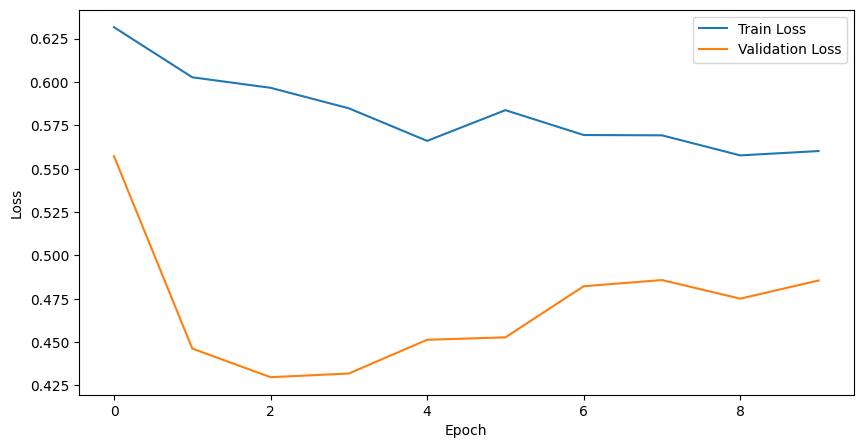

In [41]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterGrid, train_test_split
from tqdm import tqdm

# Define your MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_units, activation, dropout, normalize):
        super(MLP, self).__init__()
        layers = []
        for i in range(len(hidden_units) - 1):
            layers.append(nn.Linear(hidden_units[i], hidden_units[i + 1]))
            if normalize == 'batch':
                layers.append(nn.BatchNorm1d(hidden_units[i + 1]))
            layers.append(activation)
            layers.append(nn.Dropout(dropout))
        self.layers = nn.Sequential(*layers)

    def forward(self, x):
        x = self.layers(x)
        return x

# Function to train and evaluate the MLP model
def train_and_evaluate_MLP(model, train_loader, val_loader, learning_rate, weight_decay, num_epochs=10):
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        train_losses.append(running_loss / len(train_loader))

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels.unsqueeze(1).float())
                val_loss += loss.item()
        val_losses.append(val_loss / len(val_loader))

    return train_losses, val_losses

# Generate some sample data for demonstration

# Convert data to PyTorch tensors and create DataLoader
train_data = torch.utils.data.TensorDataset(torch.tensor(X_train, dtype=torch.float32),
                                            torch.tensor(y_train, dtype=torch.float32))
val_data = torch.utils.data.TensorDataset(torch.tensor(X_val, dtype=torch.float32),
                                          torch.tensor(y_val, dtype=torch.float32))
test_data = torch.utils.data.TensorDataset(torch.tensor(X_test, dtype=torch.float32),
                                           torch.tensor(y_test, dtype=torch.float32))

train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=32)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32)

# Define hyperparameter grid
param_grid = {
    'hidden_units': [32, 64, 128],
    'activation': [nn.Sigmoid(), nn.Tanh(), nn.ReLU()],
    'weight_decay': [0.0, 0.0001, 0.001],
    'dropout': [0.0, 0.2, 0.5],
    'normalize': [None, 'batch'],
    'learning_rate': [0.001, 0.01]
}

best_accuracy = 0.0
best_params = None
train_losses_history = []
val_losses_history = []

# Hyperparameter tuning using grid search
for params in tqdm(list(ParameterGrid(param_grid))):
    hidden_units = [X_train.shape[1]] + params['hidden_units'] + [1] if isinstance(params['hidden_units'], list) else [X_train.shape[1], params['hidden_units'], 1]  # Change 1 to match the output dimension
    model = MLP(X_train.shape[1], hidden_units, params['activation'], params['dropout'], params['normalize'])

    train_losses, val_losses = train_and_evaluate_MLP(model, train_loader, val_loader, params['learning_rate'], params['weight_decay'])

    accuracy = 0.0
    model.eval()
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            predicted = (torch.sigmoid(outputs) > 0.5).float() * 2 - 1  # Convert sigmoid output to -1 or 1
            accuracy += accuracy_score(labels.numpy(), predicted.numpy())
    accuracy /= len(test_loader)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params
        train_losses_history = train_losses
        val_losses_history = val_losses

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

# Plot training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(range(len(train_losses_history)), train_losses_history, label='Train Loss')
plt.plot(range(len(val_losses_history)), val_losses_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# You can now use the best_params to train the final model on the entire dataset.
# Create a model using best_params and train it on the entire dataset.


100%|██████████| 324/324 [02:27<00:00,  2.19it/s]


Best Hyperparameters:
{'activation': Tanh(), 'dropout': 0.5, 'hidden_units': 64, 'learning_rate': 0.001, 'normalize': 'batch', 'weight_decay': 0.0001}


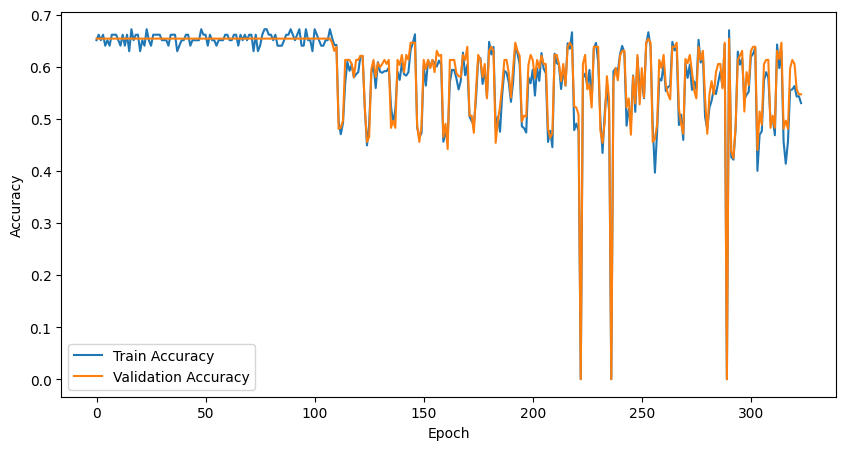

In [56]:
# Add lists to store accuracies
train_accuracies_history = []
val_accuracies_history = []

# Hyperparameter tuning using grid search
for params in tqdm(list(ParameterGrid(param_grid))):
    hidden_units = [X_train.shape[1]] + params['hidden_units'] + [1] if isinstance(params['hidden_units'], list) else [X_train.shape[1], params['hidden_units'], 1]  # Change 1 to match the output dimension
    model = MLP(X_train.shape[1], hidden_units, params['activation'], params['dropout'], params['normalize'])

    train_losses, val_losses = train_and_evaluate_MLP(model, train_loader, val_loader, params['learning_rate'], params['weight_decay'])

    # Calculate training accuracy
    train_accuracy = 0.0
    model.eval()
    with torch.no_grad():
        for inputs, labels in train_loader:
            outputs = model(inputs)
            predicted = (torch.sigmoid(outputs) > 0.5).float() * 2 - 1  # Convert sigmoid output to -1 or 1
            train_accuracy += accuracy_score(labels.numpy(), predicted.numpy())
    train_accuracy /= len(train_loader)

    # Calculate validation accuracy
    val_accuracy = 0.0
    model.eval()
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            predicted = (torch.sigmoid(outputs) > 0.5).float() * 2 - 1  # Convert sigmoid output to -1 or 1
            val_accuracy += accuracy_score(labels.numpy(), predicted.numpy())
    val_accuracy /= len(val_loader)

    train_accuracies_history.append(train_accuracy)
    val_accuracies_history.append(val_accuracy)

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

# Plot training and validation accuracies
plt.figure(figsize=(10, 5))
plt.plot(range(len(train_accuracies_history)), train_accuracies_history, label='Train Accuracy')
plt.plot(range(len(val_accuracies_history)), val_accuracies_history, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

100%|██████████| 324/324 [01:52<00:00,  2.89it/s]
/usr/local/lib/python3.10/dist-packages/numpy/lib/stride_tricks.py:538: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = [np.array(_m, copy=False, subok=subok) for _m in args]
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


ValueError: ignored

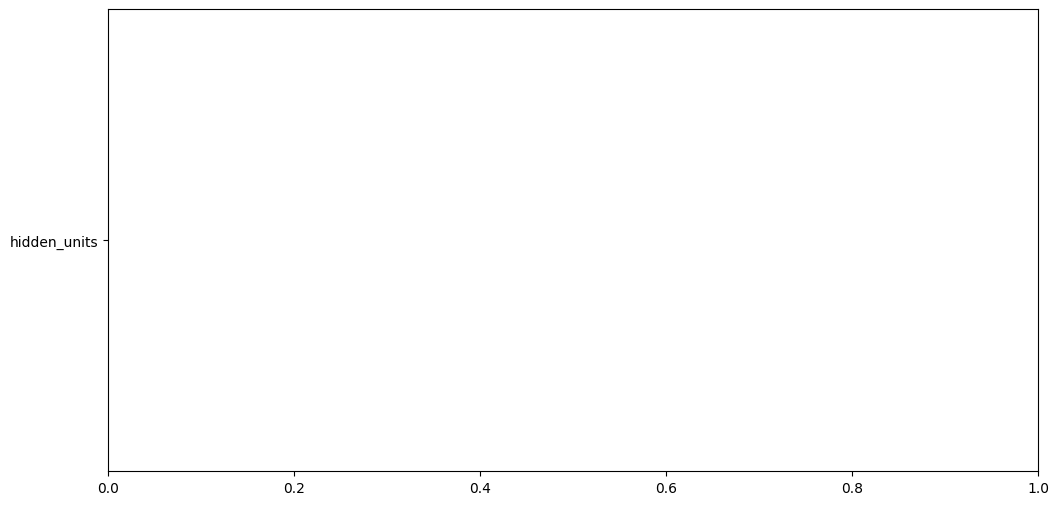

In [44]:
# Create a dictionary to store accuracy values for each parameter
param_accuracies = {param: [] for param in param_grid}

# Hyperparameter tuning using grid search
for params in tqdm(list(ParameterGrid(param_grid))):
    hidden_units = [X_train.shape[1]] + params['hidden_units'] + [1] if isinstance(params['hidden_units'], list) else [X_train.shape[1], params['hidden_units'], 1]  # Change 1 to match the output dimension
    model = MLP(X_train.shape[1], hidden_units, params['activation'], params['dropout'], params['normalize'])

    train_losses, val_losses = train_and_evaluate_MLP(model, train_loader, val_loader, params['learning_rate'], params['weight_decay'])

    # Calculate accuracy on the test set
    test_accuracy = 0.0
    model.eval()
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            predicted = (torch.sigmoid(outputs) > 0.5).float() * 2 - 1
            test_accuracy += accuracy_score(labels.numpy(), predicted.numpy())
    test_accuracy /= len(test_loader)
    # Store the accuracy in the dictionary
    param_accuracies[str(params)] = test_accuracy

    # # Convert the parameter settings to a string for use as the key
    # param_key = ', '.join([f"{key}: {value}" for key, value in params.items()])

    # # Store the accuracy in the dictionary
    # param_accuracies[param_key] = test_accuracy


# Extract parameter names and corresponding accuracies
param_names = list(param_accuracies.keys())
accuracies = list(param_accuracies.values())

# Plot accuracy for each parameter setting
plt.figure(figsize=(12, 6))
plt.barh(param_names, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.ylabel('Parameter Settings')
plt.title('Accuracy for Each Parameter Setting')
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest accuracy at the top
plt.show()
# # Plot accuracy for each parameter

# for param_name in param_grid:
#     param_values = [str(params) for params in ParameterGrid(param_grid)]
#     accuracies = [param_accuracies[str(params)] for params in ParameterGrid(param_grid)]

#     plt.figure(figsize=(10, 5))
#     plt.bar(param_values, accuracies)
#     plt.xlabel(param_name)
#     plt.ylabel('Accuracy')
#     plt.title(f'Accuracy vs. {param_name}')
#     plt.xticks(rotation=45)
#     plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


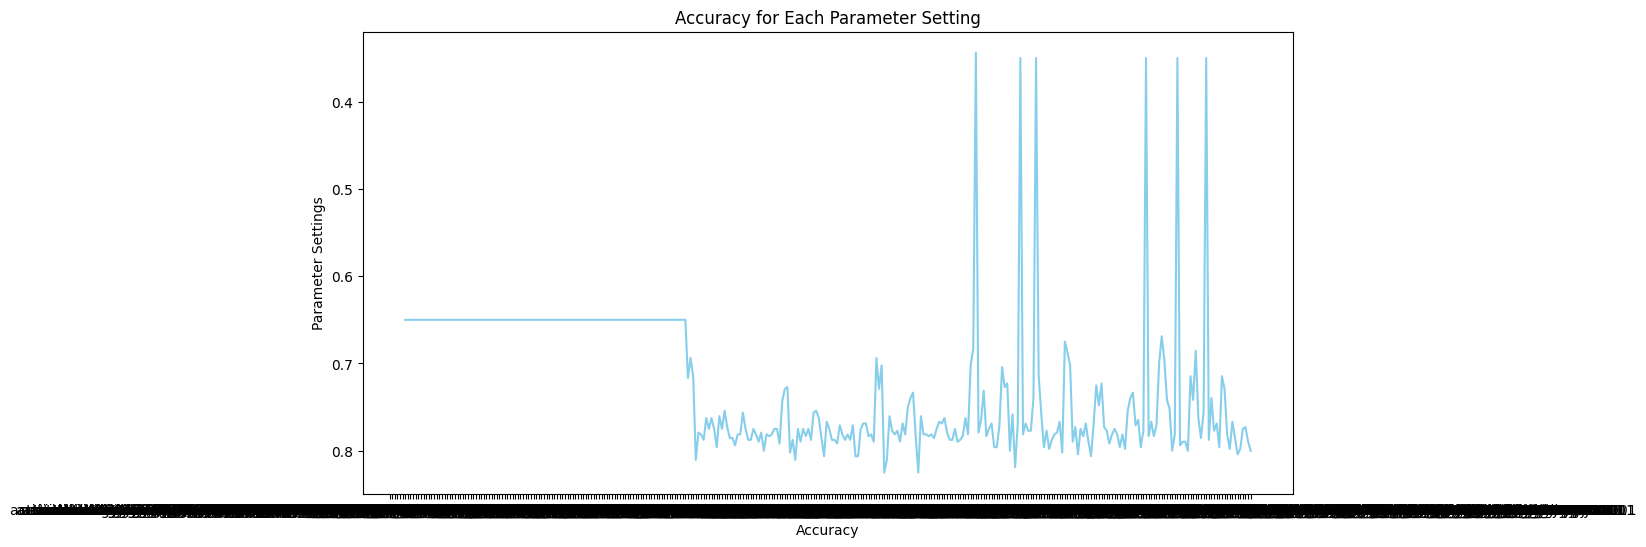

In [67]:
# Extract parameter names and corresponding accuracies
param_names = list(param_accuracies.keys())
accuracies = [np.mean(acc) for acc in param_accuracies.values()]  # Calculate the mean accuracy

# Plot accuracy for each parameter setting
plt.figure(figsize=(12, 6))
plt.plot(param_names, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.ylabel('Parameter Settings')
plt.title('Accuracy for Each Parameter Setting')
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest accuracy at the top
plt.show()

In [45]:
# Plot accuracy for each parameter
for param_name in param_grid:
    param_values = [str(params) for params in ParameterGrid(param_grid)]
    accuracies = [param_accuracies[str(params)] for params in ParameterGrid(param_grid)]

    plt.figure(figsize=(10, 5))
    plt.plot(param_values, accuracies)
    plt.xlabel(param_name)
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy vs. {param_name}')
    plt.xticks(rotation=45)
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [46]:
for param_name, accuracy in param_accuracies.items():
    print(f"{param_name}: Accuracy = {accuracy}")

hidden_units: Accuracy = []
activation: Accuracy = []
weight_decay: Accuracy = []
dropout: Accuracy = []
normalize: Accuracy = []
learning_rate: Accuracy = []
{'activation': Sigmoid(), 'dropout': 0.0, 'hidden_units': 32, 'learning_rate': 0.001, 'normalize': None, 'weight_decay': 0.0}: Accuracy = 0.65
{'activation': Sigmoid(), 'dropout': 0.0, 'hidden_units': 32, 'learning_rate': 0.001, 'normalize': None, 'weight_decay': 0.0001}: Accuracy = 0.65
{'activation': Sigmoid(), 'dropout': 0.0, 'hidden_units': 32, 'learning_rate': 0.001, 'normalize': None, 'weight_decay': 0.001}: Accuracy = 0.65
{'activation': Sigmoid(), 'dropout': 0.0, 'hidden_units': 32, 'learning_rate': 0.001, 'normalize': 'batch', 'weight_decay': 0.0}: Accuracy = 0.65
{'activation': Sigmoid(), 'dropout': 0.0, 'hidden_units': 32, 'learning_rate': 0.001, 'normalize': 'batch', 'weight_decay': 0.0001}: Accuracy = 0.65
{'activation': Sigmoid(), 'dropout': 0.0, 'hidden_units': 32, 'learning_rate': 0.001, 'normalize': 'batch', 'wei

In [60]:
for param_name, accuracy in param_accuracies.items():
    print(f"{param_name}: Accuracy = {accuracy}")

hidden_units: Accuracy = []
activation: Accuracy = []
weight_decay: Accuracy = []
dropout: Accuracy = []
normalize: Accuracy = []
learning_rate: Accuracy = []
{'activation': Sigmoid(), 'dropout': 0.0, 'hidden_units': 32, 'learning_rate': 0.001, 'normalize': None, 'weight_decay': 0.0}: Accuracy = 0.65
{'activation': Sigmoid(), 'dropout': 0.0, 'hidden_units': 32, 'learning_rate': 0.001, 'normalize': None, 'weight_decay': 0.0001}: Accuracy = 0.65
{'activation': Sigmoid(), 'dropout': 0.0, 'hidden_units': 32, 'learning_rate': 0.001, 'normalize': None, 'weight_decay': 0.001}: Accuracy = 0.65
{'activation': Sigmoid(), 'dropout': 0.0, 'hidden_units': 32, 'learning_rate': 0.001, 'normalize': 'batch', 'weight_decay': 0.0}: Accuracy = 0.65
{'activation': Sigmoid(), 'dropout': 0.0, 'hidden_units': 32, 'learning_rate': 0.001, 'normalize': 'batch', 'weight_decay': 0.0001}: Accuracy = 0.65
{'activation': Sigmoid(), 'dropout': 0.0, 'hidden_units': 32, 'learning_rate': 0.001, 'normalize': 'batch', 'wei

/usr/local/lib/python3.10/dist-packages/numpy/lib/stride_tricks.py:538: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = [np.array(_m, copy=False, subok=subok) for _m in args]
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


ValueError: ignored

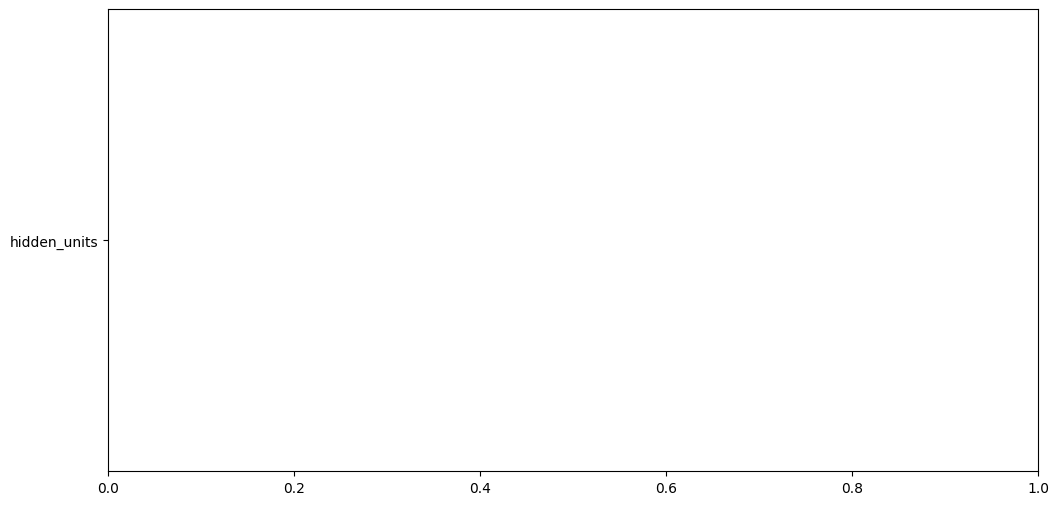

In [62]:
# Extract parameter names and corresponding accuracies
param_names = list(param_accuracies.keys())
accuracies = list(param_accuracies.values())

# Plot accuracy for each parameter setting
plt.figure(figsize=(12, 6))
plt.barh(param_names, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.ylabel('Parameter Settings')
plt.title('Accuracy for Each Parameter Setting')
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest accuracy at the top
plt.show()

In [57]:
# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

# Calculate and print the accuracy of the best model on the test set
hidden_units = [X_train.shape[1]] + params['hidden_units'] + [1] if isinstance(params['hidden_units'], list) else [X_train.shape[1], params['hidden_units'], 1]  # Change 1 to match the output dimension
best_model = MLP(X_train.shape[1], hidden_units, best_params['activation'], best_params['dropout'], best_params['normalize'])

# Train the best model on the entire training set
train_losses, _ = train_and_evaluate_MLP(best_model, train_loader, val_loader, best_params['learning_rate'], best_params['weight_decay'], num_epochs=100)

# Calculate accuracy on the test set
test_accuracy = 0.0
best_model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = best_model(inputs)
        predicted = (torch.sigmoid(outputs) > 0.5).float() * 2 - 1
        test_accuracy += accuracy_score(labels.numpy(), predicted.numpy())
test_accuracy /= len(test_loader)

# Print the test accuracy
print("Test Accuracy:", test_accuracy)


Best Hyperparameters:
{'activation': Tanh(), 'dropout': 0.5, 'hidden_units': 64, 'learning_rate': 0.001, 'normalize': 'batch', 'weight_decay': 0.0001}
Test Accuracy: 0.7833333333333333
